In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [2]:
train_path = r'../preprocessed_data/preprocessed_train.csv'
test_path = r'../preprocessed_data/preprocessed_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# DATA SPLIT

In [3]:
feature_names = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
                 'talk_time', 'blue_1', 'dual_sim_1', 'four_g_1',
                 'n_cores_2', 'n_cores_3', 'n_cores_4', 'n_cores_5', 'n_cores_6',
                 'n_cores_7', 'n_cores_8', 'three_g_1', 'touch_screen_1', 'wifi_1']

In [4]:
X = train_df[feature_names]
y = train_df['price_range']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 1021)

# KNN PARAMETER

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [8]:
score_list = []

for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, train_x, train_y, cv = 5).mean()
    score_list.append(score)

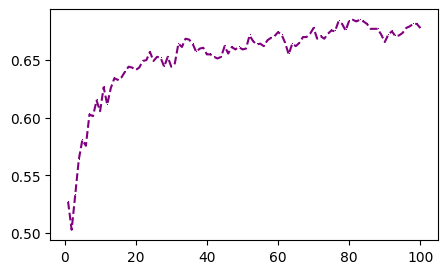

In [9]:
plt.figure(figsize = (5, 3))

plt.plot(range(1, 101), score_list, marker = ',', linestyle = '--', color = 'purple')

plt.show()

# KNN

In [10]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

knn_predict = knn.predict(valid_x)

In [11]:
knn.n_neighbors

5

In [12]:
from sklearn.metrics import accuracy_score, mean_absolute_error, root_mean_squared_error

In [13]:
knn_acc = accuracy_score(valid_y, knn_predict)
knn_mae = accuracy_score(valid_y, knn_predict)
knn_rmse = accuracy_score(valid_y, knn_predict)

print(f'''
KNN
    ACCURACY : {knn_acc}
    MAE : {knn_mae}
    RMSE : {knn_rmse}
''')


KNN
    ACCURACY : 0.5966666666666667
    MAE : 0.5966666666666667
    RMSE : 0.5966666666666667



# TEST DATA

In [14]:
test_x = test_df[feature_names]

In [15]:
test_predict = knn.predict(test_x)

knn_result = test_df[['id']]
knn_result['price_range'] = test_predict
knn_result

C:\Users\user\AppData\Local\Temp\ipykernel_3296\4171717113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_result['price_range'] = test_predict


,id,price_range
0,1,2
1,2,2
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,1
998,999,1


In [16]:
save_path = r'../result_data/KNN.csv'

knn_result.to_csv(save_path, index = False)

# RESULT VISUALIZATION

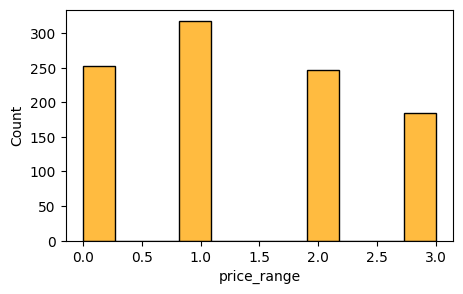

In [17]:
plt.figure(figsize = (5, 3))

sns.histplot(knn_result, x = 'price_range', color = 'orange')

plt.show()

In [18]:
knn_result['price_range'].value_counts()

price_range
1    318
0    252
2    246
3    184
Name: count, dtype: int64